<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/08_transfer_learning_tensorflow_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Tue Oct 26 05:20:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Creating the Helper function

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-10-26 05:20:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-26 05:20:24 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# import helper functions
import helper_functions

In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

### Input Data

In [6]:
# Input Data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-10-26 05:20:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   160MB/s    in 1.0s    

2021-10-26 05:20:28 (160 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [8]:
#Create training and test directory paths

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [9]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
#for images, labels in train_data_10_percent.take(1):
  #print(images, labels)

### Model 0: Building a transfer learning model using the Keras Function

In [13]:
# Create the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into model
inputs = tf.keras.layers.Input(shape=(224, 224,3), name="input_layer")

# Normalize the inputs
#x = tf.keras.experimental.preprosessing.Rescaling(1./255)(inputs)

# Pass the inputs to base model
x = base_model(inputs)
print(f"Shapes after passing inputs through base model:{x.shape}")

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shapes after GlobalAveragePooling2D:{x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs and outputs
model_0 = tf.keras.Model(inputs, outputs)


16719872/16705208 [==============================] - 0s 0us/step
Shapes after passing inputs through base model:(None, 7, 7, 1280)
Shapes after GlobalAveragePooling2D:(None, 1280)


In [14]:
# Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [15]:
# Fit the model
history_0 = model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                   experiment_name="model_0")])

Saving TensorBoard log files to: tensorflow_hub/model_0/20211026-052037
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 28s 274ms/step - loss: 1.8735 - accuracy: 0.4400 - val_loss: 1.2848 - val_accuracy: 0.7401
Epoch 2/5
24/24 [==============================] - 5s 178ms/step - loss: 1.1392 - accuracy: 0.7520 - val_loss: 0.8908 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 5s 178ms/step - loss: 0.8417 - accuracy: 0.8027 - val_loss: 0.7407 - val_accuracy: 0.8224
Epoch 4/5
24/24 [==============================] - 4s 146ms/step - loss: 0.6777 - accuracy: 0.8413 - val_loss: 0.6190 - val_accuracy: 0.8372
Epoch 5/5
24/24 [==============================] - 4s 145ms/step - loss: 0.5950 - accuracy: 0.8600 - val_loss: 0.5696 - val_accuracy: 0.8487


In [16]:
# Check the layersin base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7f395917a8d0>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f3959ab8510>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f3959aa7550>
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7f39583f3690>
4 <keras.layers.convolutional.Conv2D object at 0x7f39583ca110>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3958393590>
6 <keras.layers.core.Activation object at 0x7f3958390610>
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f39582de610>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3958355e90>
9 <keras.layers.core.Activation object at 0x7f39582f8b10>
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f3958307910>
11 <keras.layers.core.Reshape object at 0x7f3958299290>
12 <keras.layers.convolutional.Conv2D object at 0x7f395829f7d0>
13 <keras.layers.convolutional.Conv2D object at 0x7f3958473c

In [17]:
# summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [18]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


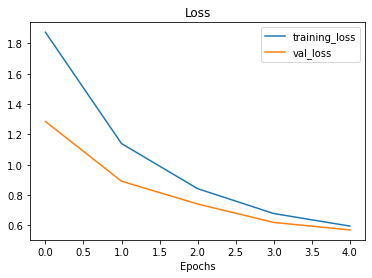

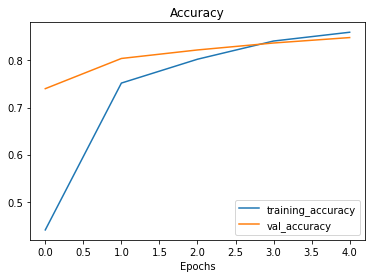

In [19]:
plot_loss_curves(history_0)

### Getting a feature vector from a trained model

In [20]:
# Create a random tensor
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}\n")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]



In [21]:
#pass the random tensor to the global average pooling 2d
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global Average pooled Tensor: \n {global_average_pooled_tensor}\n")

2D global Average pooled Tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]]



In [22]:
global_average_pooled_tensor.shape

TensorShape([1, 3])

In [23]:
#replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [24]:
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D global Average pooled Tensor: \n {global_max_pooled_tensor}\n")
global_max_pooled_tensor.shape

2D global Average pooled Tensor: 
 [[0.9058464 1.1603122 1.6994323]]



TensorShape([1, 3])

In [25]:
#replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

### Model 1 - Feature Extraction with 1% Data with Data agumentation

In [26]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2021-10-26 05:21:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   168MB/s    in 0.8s    

2021-10-26 05:21:26 (168 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [27]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There a

In [28]:
#Create training and test directory paths

train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [29]:
# Data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [30]:
train_data_1_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [31]:
# using Data Augumentation within the model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augumentation = keras.Sequential([
                                       preprocessing.RandomFlip("horizontal"),
                                       preprocessing.RandomRotation(0.2),
                                       preprocessing.RandomZoom(0.2),
                                       preprocessing.RandomHeight(0.2),
                                       preprocessing.RandomWidth(0.2),
                                       #preprocessing.Rescale(1./255.)
],name="data_agumentation")



(-0.5, 581.5, 459.5, -0.5)

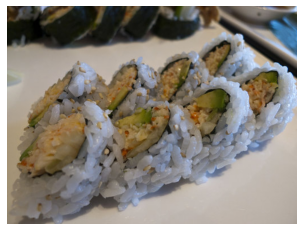

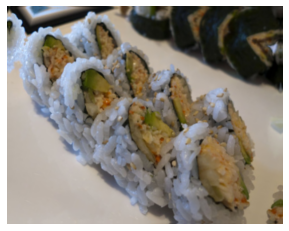

In [32]:
# visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

image = mpimg.imread(random_image_path)
#print("Original image")
plt.imshow(image)
plt.axis(False)

#plot the agumented random image
agumented_image = data_augumentation(tf.expand_dims(image, axis=0))
plt.figure()
#print("Augumented image")
plt.imshow(tf.squeeze(agumented_image)/255.)
plt.axis(False)

In [33]:
# model creation
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layers
inputs = layers.Input(shape=input_shape, name="input_layer")

# add augmented data
x = data_augumentation(inputs)

#give base model the inputs
x = base_model(x, training=False)

#Pool output features
x = layers.GlobalAveragePooling2D(name="global_Average_pooling")(x)

# Dense layer output
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

#Make a model
model_1 = tf.keras.Model(inputs, outputs)

#compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                               experiment_name="Model_1")])

Saving TensorBoard log files to: tensorflow_hub/Model_1/20211026-052132
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 12s 3s/step - loss: 2.3986 - accuracy: 0.1000 - val_loss: 2.2480 - val_accuracy: 0.1661
Epoch 2/5
3/3 [==============================] - 2s 1s/step - loss: 2.1954 - accuracy: 0.2000 - val_loss: 2.1091 - val_accuracy: 0.2516
Epoch 3/5
3/3 [==============================] - 2s 1s/step - loss: 1.9302 - accuracy: 0.4143 - val_loss: 2.0181 - val_accuracy: 0.3109
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7692 - accuracy: 0.5143 - val_loss: 1.9222 - val_accuracy: 0.4013
Epoch 5/5
3/3 [==============================] - 2s 1s/step - loss: 1.6772 - accuracy: 0.5429 - val_loss: 1.8322 - val_accuracy: 0.4507


In [34]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_agumentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_Average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [35]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 1.8365 - accuracy: 0.4468


[1.8364521265029907, 0.44679999351501465]

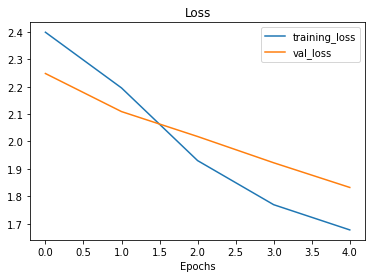

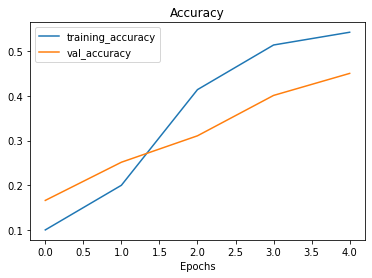

In [36]:
plot_loss_curves(history_1)

### Model 2: Data augmentation with 10% data

In [37]:
#Create training and test directory paths

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [38]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [39]:
# using Data Augumentation within the model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augumentation = keras.Sequential([
                                       preprocessing.RandomFlip("horizontal"),
                                       preprocessing.RandomRotation(0.2),
                                       preprocessing.RandomZoom(0.2),
                                       preprocessing.RandomHeight(0.2),
                                       preprocessing.RandomWidth(0.2),
                                       #preprocessing.Rescale(1./255.)
],name="data_agumentation")

In [83]:
# Model 2
# Create the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into model
inputs = tf.keras.layers.Input(shape=(224, 224,3), name="input_layer")

# Normalize the inputs
#x = tf.keras.experimental.preprosessing.Rescaling(1./255)(inputs)

# add augmented data
x = data_augumentation(inputs)

# Pass the inputs to base model
x = base_model(x, training=False)
print(f"Shapes after passing inputs through base model:{x.shape}")

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shapes after GlobalAveragePooling2D:{x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

Shapes after passing inputs through base model:(None, 7, 7, 1280)
Shapes after GlobalAveragePooling2D:(None, 1280)


In [84]:
#compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [85]:
# Model checkpoint callbacks
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=False,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [86]:
#fit the model
history_2 = model_2.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                               experiment_name="Model_2"), checkpoint_callback])

Saving TensorBoard log files to: tensorflow_hub/Model_2/20211026-063833
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 322ms/step - loss: 1.9850 - accuracy: 0.3533 - val_loss: 1.4795 - val_accuracy: 0.6201

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
24/24 [==============================] - 6s 209ms/step - loss: 1.3667 - accuracy: 0.6560 - val_loss: 1.1080 - val_accuracy: 0.7253

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/5
24/24 [==============================] - 6s 220ms/step - loss: 1.0545 - accuracy: 0.7520 - val_loss: 0.8875 - val_accuracy: 0.7780

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/5
24/24 [==============================] - 6s 216ms/step - loss: 0.9027 - accuracy: 0.7693 - val_loss: 0.7616 - val_accuracy: 0.8059

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/5
24/24 [==============================] - 6s 215ms/step - loss: 0.7910 - accuracy: 0.8080 - val_loss: 0.7024 - val_accuracy: 0.7944

Epoch 00005: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoint.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [79]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.5166 - accuracy: 0.8272


[0.5166099071502686, 0.8271999955177307]

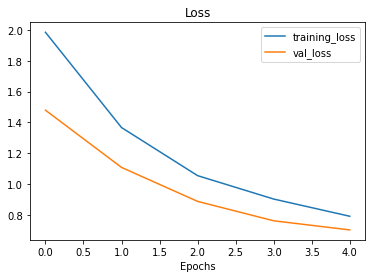

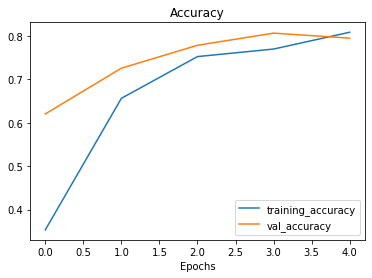

In [87]:
plot_loss_curves(history_2)

In [46]:
# loading in checkpointed weights

model_2.load_weights(checkpoint_path)

In [47]:
loaded_weights_result = model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.6943 - accuracy: 0.8080


In [48]:
loaded_weights_result

[0.6943485140800476, 0.8080000281333923]

In [49]:
model_2.layers

In [50]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f38c575a9d0> True
<keras.engine.sequential.Sequential object at 0x7f38c6732f50> True
<keras.engine.functional.Functional object at 0x7f38c61c2390> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f38c6202350> True
<keras.layers.core.Dense object at 0x7f384e93c690> True


In [51]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [52]:
# How many trainable variables in base model
print(len(model_2.layers[2].trainable_variables))

0


In [88]:
# To begin fine-tuning by setting last ten layers of base_model.trainable=True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable= False

In [89]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable) 

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [90]:
# Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [91]:
# How many trainable variables in base model
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs


In [92]:
# Model checkpoint callbacks
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [93]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

In [94]:
#fit the model
history_2_fine = model_2.fit(train_data_10_percent,
                        epochs=fine_tune_epochs,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch= history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                               experiment_name="Model_2_fine")])

Saving TensorBoard log files to: tensorflow_hub/Model_2_fine/20211026-064455
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 18s 325ms/step - loss: 0.6641 - accuracy: 0.8093 - val_loss: 0.6008 - val_accuracy: 0.8010
Epoch 6/10
24/24 [==============================] - 5s 197ms/step - loss: 0.5544 - accuracy: 0.8267 - val_loss: 0.5727 - val_accuracy: 0.8043
Epoch 7/10
24/24 [==============================] - 5s 188ms/step - loss: 0.4766 - accuracy: 0.8560 - val_loss: 0.5726 - val_accuracy: 0.7993
Epoch 8/10
24/24 [==============================] - 5s 212ms/step - loss: 0.4367 - accuracy: 0.8693 - val_loss: 0.5507 - val_accuracy: 0.8092
Epoch 9/10
24/24 [==============================] - 5s 209ms/step - loss: 0.4140 - accuracy: 0.8667 - val_loss: 0.5230 - val_accuracy: 0.8191
Epoch 10/10
24/24 [==============================] - 5s 208ms/step - loss: 0.3538 - accuracy: 0.9000 - val_loss: 0.5143 - val_accuracy: 0.8273


In [95]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.5026 - accuracy: 0.8360


[0.5026164054870605, 0.8360000252723694]

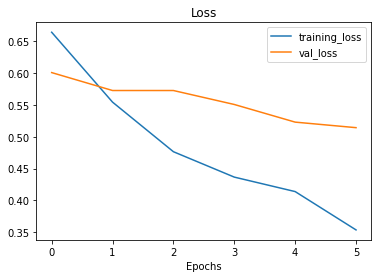

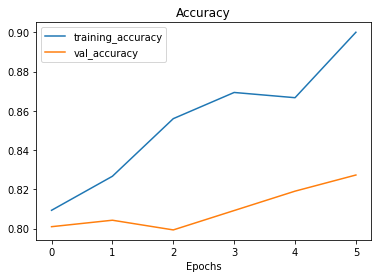

In [96]:
plot_loss_curves(history_2_fine)

In [97]:
# function to compare training histories
def compare_history(original_history, new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val_Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start fine tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation loss")

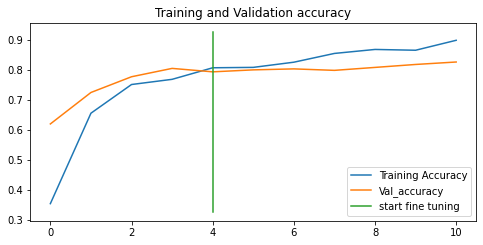

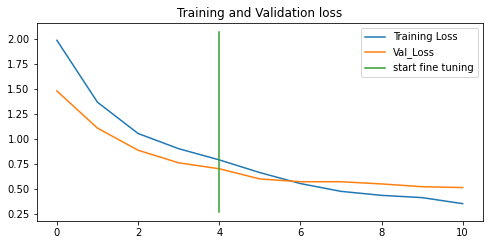

In [98]:
compare_history(history_2, history_2_fine)

### Model 4 with 100% Data

In [99]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-10-26 06:46:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   143MB/s    in 3.6s    

2021-10-26 06:46:39 (138 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [100]:
unzip_data("10_food_classes_all_data.zip")

In [101]:
# setup training and test dir
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [102]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [103]:
# setup data inputs
IMG_SIZE = (224, 224)

train_data_100_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                             label_mode="categorical",
                                                                             image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [104]:
model_2.load_weights(checkpoint_path)

In [105]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.7000 - accuracy: 0.8108


[0.7000274658203125, 0.8108000159263611]

In [106]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable )

0 input_layer True
1 data_agumentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [109]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [110]:
# Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [111]:
#fit the model
history_2_fine_100 = model_2.fit(train_data_100_percent,
                        epochs=fine_tune_epochs,
                        steps_per_epoch=len(train_data_100_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch= history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                               experiment_name="Model_2_fine_100")])

Saving TensorBoard log files to: tensorflow_hub/Model_2_fine_100/20211026-065730
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 34s 114ms/step - loss: 0.7293 - accuracy: 0.7657 - val_loss: 0.4305 - val_accuracy: 0.8586
Epoch 6/10
235/235 [==============================] - 27s 112ms/step - loss: 0.5905 - accuracy: 0.8077 - val_loss: 0.3726 - val_accuracy: 0.8750
Epoch 7/10
235/235 [==============================] - 26s 108ms/step - loss: 0.5214 - accuracy: 0.8311 - val_loss: 0.3478 - val_accuracy: 0.8865
Epoch 8/10
235/235 [==============================] - 26s 107ms/step - loss: 0.4799 - accuracy: 0.8477 - val_loss: 0.3338 - val_accuracy: 0.8914
Epoch 9/10
235/235 [==============================] - 25s 103ms/step - loss: 0.4405 - accuracy: 0.8552 - val_loss: 0.3309 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 25s 104ms/step - loss: 0.4015 - accuracy: 0.8707 - val_loss: 0.3085 - val_accuracy: 0.8898
